In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [3]:
print(df.info)

<bound method DataFrame.info of               Дата  Склад   Контрагент Номенклатура  Количество
0       2018-01-04      1    address_0    product_0           4
1       2018-01-04      1    address_0    product_1           4
2       2018-01-04      1    address_0    product_2           5
3       2018-01-04      1    address_0    product_3          10
4       2018-01-04      1    address_0    product_4           2
...            ...    ...          ...          ...         ...
301350  2018-08-31      5  address_173   product_15           0
301351  2018-08-31      5  address_173   product_17           1
301352  2018-08-31      5  address_173   product_18           1
301353  2018-08-31      5  address_173   product_19           0
301354  2018-08-31      5  address_173   product_20           2

[301355 rows x 5 columns]>


Проверяем формат столбцов

In [4]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

# Изменяем формат даты
df['Дата'] = df['Дата'].dt.strftime('%d.%m.%Y')
print(df)

              Дата  Склад   Контрагент Номенклатура  Количество
0       04.01.2018      1    address_0    product_0           4
1       04.01.2018      1    address_0    product_1           4
2       04.01.2018      1    address_0    product_2           5
3       04.01.2018      1    address_0    product_3          10
4       04.01.2018      1    address_0    product_4           2
...            ...    ...          ...          ...         ...
301350  31.08.2018      5  address_173   product_15           0
301351  31.08.2018      5  address_173   product_17           1
301352  31.08.2018      5  address_173   product_18           1
301353  31.08.2018      5  address_173   product_19           0
301354  31.08.2018      5  address_173   product_20           2

[301355 rows x 5 columns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [6]:
grouped_df = df.groupby('Дата')['Количество'].agg(['sum'])
print(grouped_df)

             sum
Дата            
01.02.2018  3770
01.03.2018  3848
01.04.2018  3786
01.05.2018  4221
01.06.2018  4736
...          ...
31.01.2018  4123
31.03.2018  3664
31.05.2018  4784
31.07.2018  6217
31.08.2018  4570

[205 rows x 1 columns]


Вывести несколько первых строк сгруппированных данных

In [7]:
print(grouped_df.head())

             sum
Дата            
01.02.2018  3770
01.03.2018  3848
01.04.2018  3786
01.05.2018  4221
01.06.2018  4736


Нарисуйте график продаж у `grouped_df`

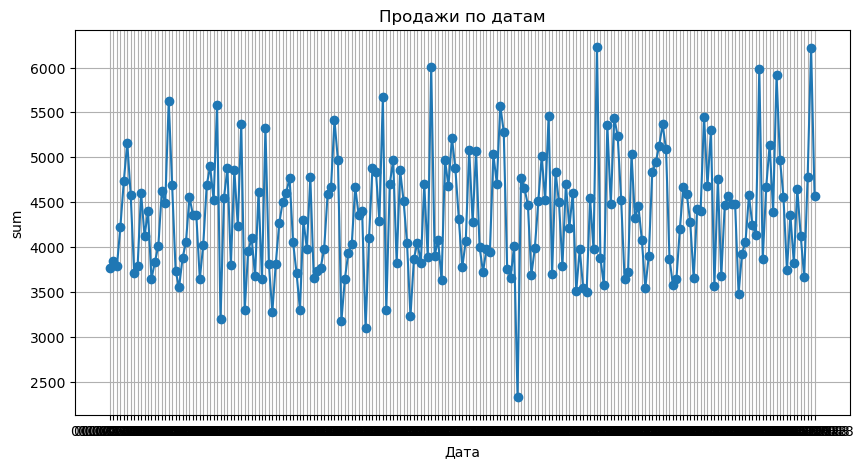

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_df, marker='o')

plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('sum')
plt.grid(True)

plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [9]:
# в среднем продажи идут ровно по датам но есть 1 крупный выброс

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [10]:
max_outlier = df.loc[df['Количество'].idxmax()]

print("Строка с максимальным количеством /продаж:")
print(max_outlier)

Строка с максимальным количеством /продаж:
Дата             28.06.2018
Склад                     1
Контрагент      address_208
Номенклатура      product_0
Количество              200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [11]:
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')

if df['Дата'].isnull().any():
    print("В столбце 'Дата' есть некорректные значения, которые не удалось преобразовать.")
else:
    df_filtered = df[(df['Склад'] == 3) & 
                     (df['Дата'].dt.month.isin([6, 7, 8])) & 
                     (df['Дата'].dt.day_name() == 'Wednesday')]

    grouped_df3 = df_filtered.groupby('Номенклатура')['Количество'].sum()

    top_product = grouped_df.idxmax()
    top_sales = grouped_df.max()

    print(f"Топовый товар: {top_product}, Общие продажи: {top_sales}")

Топовый товар: sum    21.08.2018
dtype: object, Общие продажи: sum    6226
dtype: int64


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [12]:
pip install xlrd>=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [13]:
df2 = pd.read_excel('35188.01.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.xls')

# Вывод первых 5 строк для проверки
print(df2.head())

                 Дата     T
0 2018-08-31 23:00:00   8.2
1 2018-08-31 20:00:00   9.6
2 2018-08-31 17:00:00  11.3
3 2018-08-31 14:00:00  12.3
4 2018-08-31 11:00:00  13.2


In [14]:
df2['Дата'] = df2['Дата'].dt.date
df2

,Дата,T
0,2018-08-31,8.2
1,2018-08-31,9.6
2,2018-08-31,11.3
3,2018-08-31,12.3
4,2018-08-31,13.2
...,...,...
1937,2018-01-01,-6.7
1938,2018-01-01,-8.5
1939,2018-01-01,-11.1
1940,2018-01-01,-10.8


In [15]:
grouped_df2 = df2.groupby('Дата')['T'].agg('mean')

In [16]:
grouped_df2

Дата
2018-01-01    -9.4625
2018-01-02    -9.5125
2018-01-03   -11.4625
2018-01-04   -14.0750
2018-01-05   -16.8625
               ...   
2018-08-27    12.5250
2018-08-28    14.1125
2018-08-29    13.8250
2018-08-30    14.1750
2018-08-31    11.0250
Name: T, Length: 243, dtype: float64

In [17]:
grouped_df = df.groupby('Дата')['Количество'].agg(['sum']).reset_index()
grouped_df['Дата'] = grouped_df['Дата'].dt.date
print(grouped_df)

           Дата   sum
0    2018-01-04  3734
1    2018-01-05  3643
2    2018-01-06  3193
3    2018-01-07  3298
4    2018-01-09  4055
..          ...   ...
200  2018-08-26  5302
201  2018-08-28  5983
202  2018-08-29  4969
203  2018-08-30  4648
204  2018-08-31  4570

[205 rows x 2 columns]


In [18]:
merged_df = pd.merge(grouped_df, grouped_df2, on='Дата')
merged_df

,Дата,sum,T
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500
...,...,...,...
200,2018-08-26,5302,11.9750
201,2018-08-28,5983,14.1125
202,2018-08-29,4969,13.8250
203,2018-08-30,4648,14.1750


In [19]:
print("Столбцы в grouped_df:", grouped_df.columns)
print("Столбцы в df2:",df2.columns)

Столбцы в grouped_df: Index(['Дата', 'sum'], dtype='object')
Столбцы в df2: Index(['Дата', 'T'], dtype='object')


In [20]:
print(type(grouped_df))
print(type(df2))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


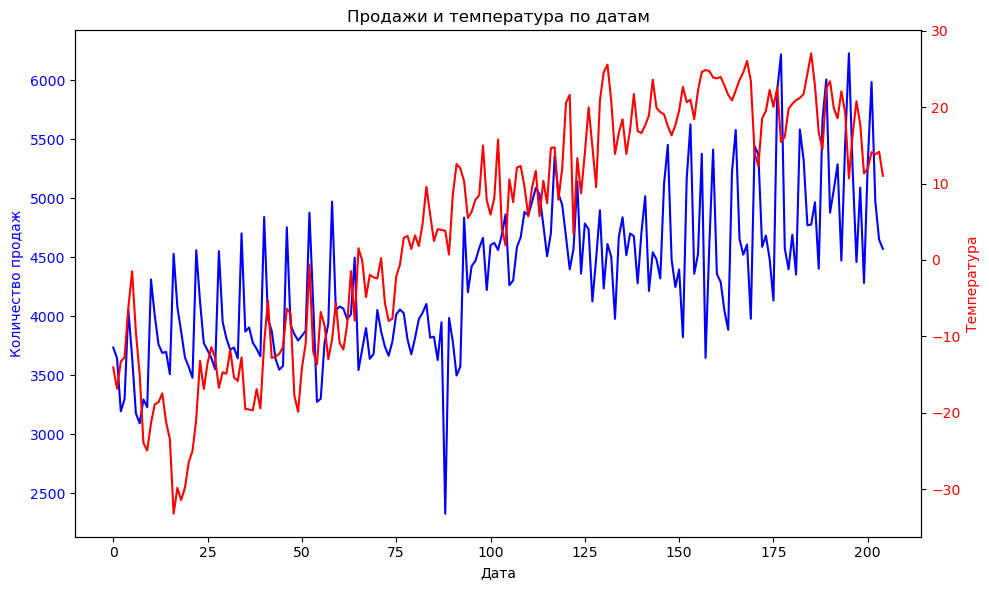

In [21]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_df.index, merged_df['sum'], label='Количество продаж', color='b')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['T'], label='Температура', color='r')
ax2.set_ylabel('Температура', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Продажи и температура по датам')
fig.tight_layout()
plt.show()

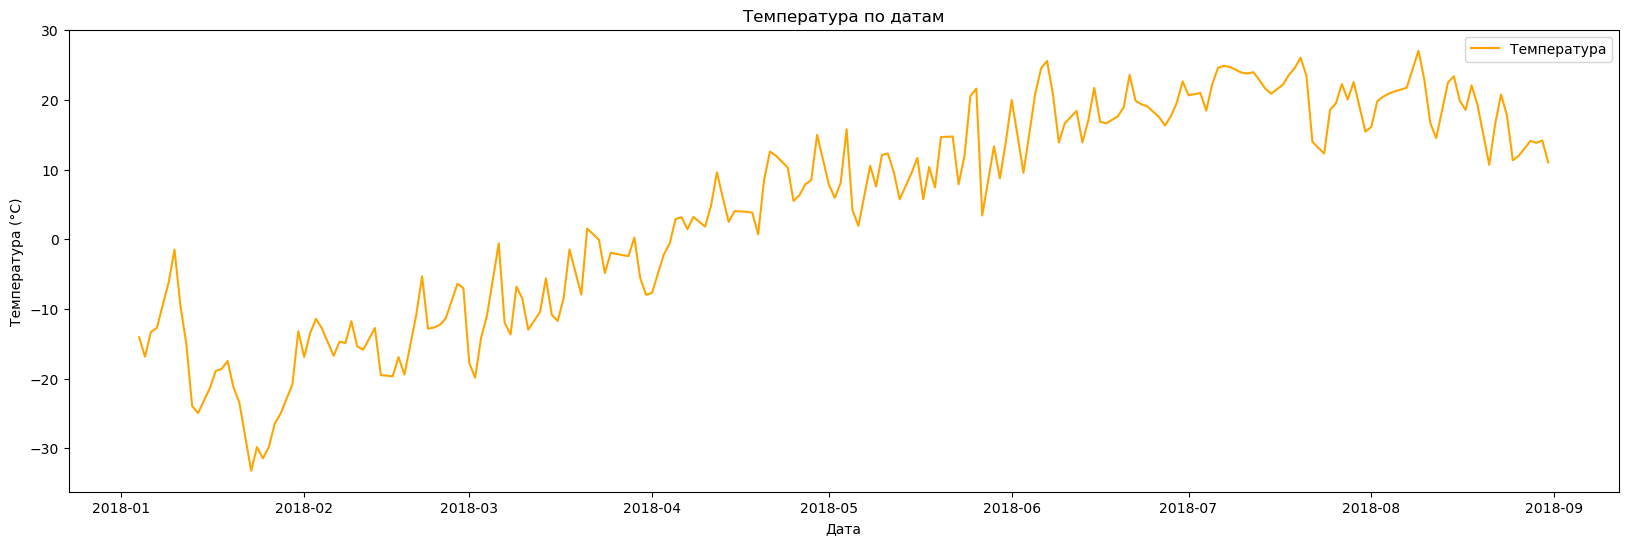

In [22]:
plt.figure(figsize=(20, 6))
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='orange')

plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Температура по датам')
plt.legend()
plt.show()